In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Step 1: Load and prepare data
data = pd.read_csv("/MusaddiqueHussainLabs/ml_regression_taxi_fare_prediction/data/raw/taxi-fare-full.csv", encoding="utf-8")

# Remove outliers in fare_amount column
data = data[(data['fare_amount'] >= 1) & (data['fare_amount'] <= 150)]

# Separate features and target
X = data.drop(columns=['fare_amount'])
y = data['fare_amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create pipeline for data preprocessing and model training
numeric_features = ['passenger_count', 'trip_time_in_secs', 'trip_distance']
categorical_features = ['vendor_id', 'rate_code', 'payment_type']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Add model training to the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(max_iter=1000, tol=1e-3))  # SDG Regressor equivalent in scikit-learn
])

# Step 3: Train the model
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Step 5: Make predictions
sample_data = {
    'vendor_id': ['VTS'],
    'rate_code': [1],
    'passenger_count': [1],
    'trip_time_in_secs': [1140],
    'trip_distance': [3.75],
    'payment_type': ['CRD']
}




Mean Squared Error: 7.31
Mean Absolute Error: 0.80


In [3]:
sample_df = pd.DataFrame(sample_data)
prediction = model.predict(sample_df)

print(f"Predicted fare: {prediction[0]}")

Predicted fare: 15.718281690559667


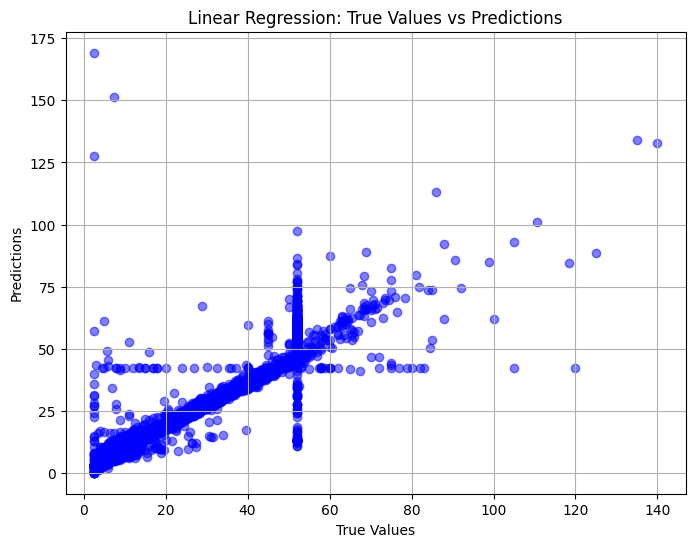

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: True Values vs Predictions')
plt.grid(True)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Step 1: Load and prepare data
data = pd.read_csv("/MusaddiqueHussainLabs/ml_regression_taxi_fare_prediction/data/raw/taxi-fare-full.csv", encoding="utf-8")

# Remove outliers in fare_amount column
data = data[(data['fare_amount'] >= 1) & (data['fare_amount'] <= 150)]

# Separate features and target
X = data.drop(columns=['fare_amount'])
y = data['fare_amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create pipeline for data preprocessing and model training
numeric_features = ['passenger_count', 'trip_time_in_secs', 'trip_distance']
categorical_features = ['vendor_id', 'rate_code', 'payment_type']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Dictionary of models to try
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print("----------------------------------------")


Model: Linear Regression
Mean Squared Error: 7.40
Mean Absolute Error: 0.78
----------------------------------------
Model: Ridge Regression
Mean Squared Error: 7.28
Mean Absolute Error: 0.78
----------------------------------------
Model: Lasso Regression
Mean Squared Error: 13.52
Mean Absolute Error: 1.25
----------------------------------------
Model: Random Forest
Mean Squared Error: 2.87
Mean Absolute Error: 0.39
----------------------------------------


In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Step 1: Load and prepare data
data = pd.read_csv("/MusaddiqueHussainLabs/ml_regression_taxi_fare_prediction/data/raw/taxi-fare-full.csv", encoding="utf-8")

# Remove outliers in fare_amount column
data = data[(data['fare_amount'] >= 1) & (data['fare_amount'] <= 150)]

# Separate features and target
X = data.drop(columns=['fare_amount'])
y = data['fare_amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create pipeline for data preprocessing and model training
numeric_features = ['passenger_count', 'trip_time_in_secs', 'trip_distance']
categorical_features = ['vendor_id', 'rate_code', 'payment_type']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Dictionary of models to try
models = {
    'Linear Regression': LinearRegression(),
    # 'Ridge Regression': Ridge(),
    # 'Lasso Regression': Lasso(),
    # 'Elastic Net': ElasticNet(),
    # 'Random Forest': RandomForestRegressor(),
    # 'Gradient Boosting': GradientBoostingRegressor()
}

import numpy as np

best_model = None
best_mse = float('inf')

# Identify categorical columns
categorical_columns = ['vendor_id', 'rate_code', 'payment_type']

# Drop non-numeric columns
X_numeric = X.drop(columns=categorical_columns)

for name, model in models.items():
    # Check if the model can handle non-numeric data
    if not hasattr(model, 'fit'):
        print(f"Model {name} does not support fitting on non-numeric data.")
        continue

    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Check if any non-numeric data exists in numeric features
    if not np.issubdtype(X_numeric.dtypes, np.number) or np.isnan(X_numeric.values).any():
        print("Non-numeric or NaN values detected in numeric features.")
        continue

    # Cross-validation for model evaluation
    cv_mse = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Check for 'nan' values in MSE
    if np.isnan(cv_mse).any():
        print("Invalid MSE values detected.")
        continue

    avg_mse = cv_mse.mean()

    print(f"Model: {name}")
    print(f"Average MSE: {avg_mse:.2f}")
    print("----------------------------------------")

    # Track the best model based on MSE
    if avg_mse < best_mse:
        best_mse = avg_mse
        best_model = model_pipeline

# Check if a model was assigned before calling fit()
if best_model is not None:
    # Fit the best model on the entire training set
    best_model.fit(X_train, y_train)

    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Best Model MSE on Test Data: {mse:.2f}")
else:
    print("No best model found.")


Non-numeric or NaN values detected in numeric features.
No best model found.


In [8]:
sample_data = {
    'vendor_id': ['VTS'],
    'rate_code': [1],
    'passenger_count': [1],
    'trip_time_in_secs': [1260],
    'trip_distance': [10.32],
    'payment_type': ['CRD']
}

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Step 1: Load and prepare data
data = pd.read_csv("/MusaddiqueHussainLabs/ml_regression_taxi_fare_prediction/data/raw/taxi-fare-full.csv", encoding="utf-8")

# Remove outliers in fare_amount column
data = data[(data['fare_amount'] >= 1) & (data['fare_amount'] <= 150)]

# Separate features and target
X = data.drop(columns=['fare_amount'])
y = data['fare_amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create pipeline for data preprocessing and model training
numeric_features = ['passenger_count', 'trip_time_in_secs', 'trip_distance']
categorical_features = ['vendor_id', 'rate_code', 'payment_type']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Dictionary of models to try
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'SDG Regressor': SGDRegressor(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

mse_scores = []
mae_scores = []

for name, model in models.items():
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    mse_scores.append(mse)
    mae_scores.append(mae)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")

    sample_df = pd.DataFrame(sample_data)
    prediction = model_pipeline.predict(sample_df)

    print(f"Predicted fare: {prediction[0]}")
    
    print("----------------------------------------")

    


Model: Linear Regression
Mean Squared Error: 7.40
Mean Absolute Error: 0.78
Predicted fare: 27.23980712890625
----------------------------------------
Model: Ridge Regression
Mean Squared Error: 7.28
Mean Absolute Error: 0.78
Predicted fare: 27.251733004095126
----------------------------------------
Model: Lasso Regression
Mean Squared Error: 13.52
Mean Absolute Error: 1.25
Predicted fare: 27.609924262420563
----------------------------------------
Model: SDG Regressor
Mean Squared Error: 7.43
Mean Absolute Error: 0.75
Predicted fare: 27.67334176857028
----------------------------------------
Model: Elastic Net
Mean Squared Error: 17.92
Mean Absolute Error: 1.92
Predicted fare: 23.83542777346158
----------------------------------------
Model: Random Forest
Mean Squared Error: 2.80
Mean Absolute Error: 0.39
Predicted fare: 29.9
----------------------------------------
Model: Gradient Boosting
Mean Squared Error: 2.67
Mean Absolute Error: 0.45
Predicted fare: 29.827418303612312
--------

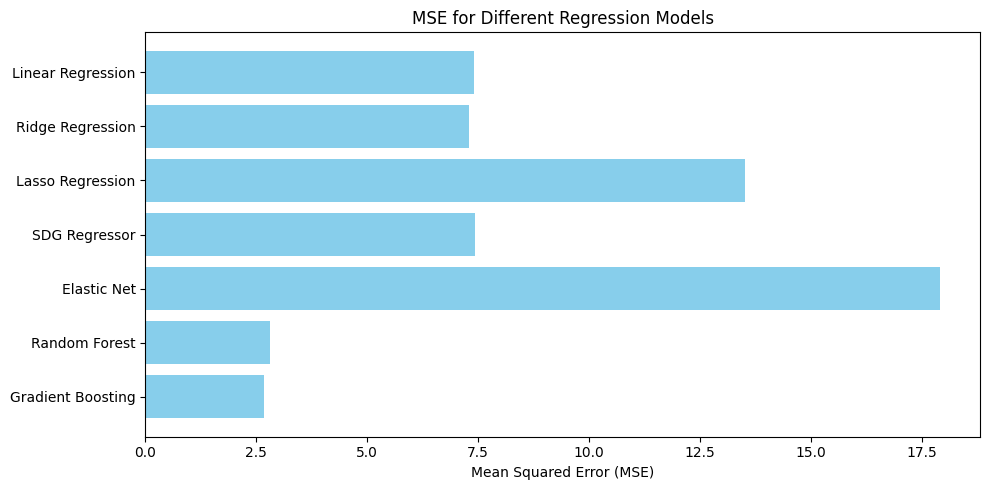

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(list(models.keys()), mse_scores, color='skyblue')
plt.xlabel('Mean Squared Error (MSE)')
plt.title('MSE for Different Regression Models')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

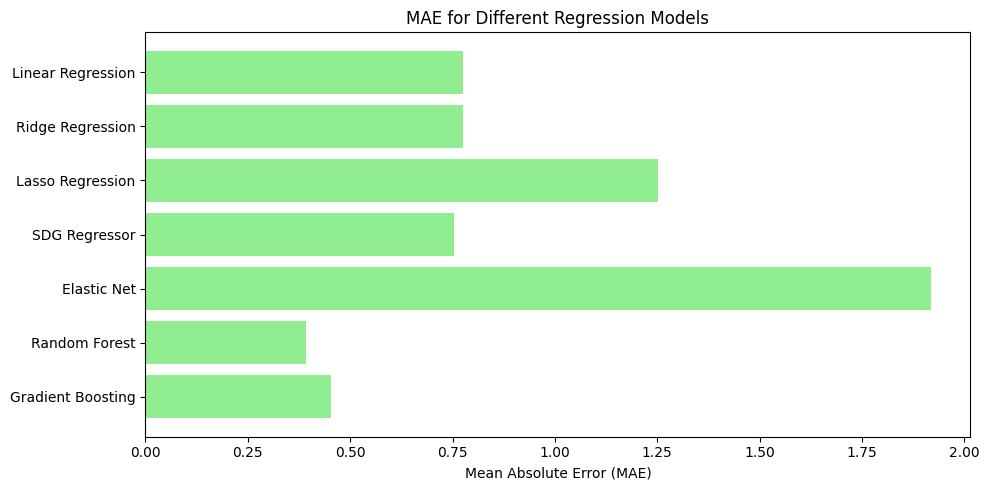

In [13]:
plt.figure(figsize=(10, 5))
plt.barh(list(models.keys()), mae_scores, color='lightgreen')
plt.xlabel('Mean Absolute Error (MAE)')
plt.title('MAE for Different Regression Models')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()